In [1]:
import pandas as pd
import numpy as np
np.random.seed(20180101)

In [61]:
import scipy as sp
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline

# World cup games


In [3]:
%%file actual_results.csv
Home Team,Away Team,Home Goals,Away Goals
Russia,Saudi Arabia,5,0
Egypt,Uruguay,0,1
Morocco,Iran,0,1
Portugal,Spain,3,3
France,Australia,2,1
Argentina,Iceland,1,1
Peru,Denmark,0,1
Croatia,Nigeria,2,0
Costa Rica,Serbia,0,1
Germany,Mexico,0,1
Brazil,Switzerland,1,1
Sweden,Korea Republic,1,0
Belgium,Panama,3,0
Tunisia,England,1,2
Colombia,Japan,1,2
Poland,Senegal,1,2
Russia,Egypt,3,1
Portugal,Morocco,1,0
Uruguay,Saudi Arabia,1,0
Iran,Spain,0,1
Denmark,Australia,1,1
France,Peru,1,0
Argentina,Croatia,0,3
Brazil,Costa Rica,2,0
Nigeria,Iceland,5,2
Serbia,Switzerland,1,2
Belgium,Tunisia,5,2
Korea Republic,Mexico,1,2
Germany,Sweden,2,1
England,Panama,6,1
Japan,Senegal,2,2
Poland,Colombia,0,3
Uruguay,Russia,3,0
Saudi Arabia,Egypt,2,1
Iran,Portugal,1,1
Spain,Morocco,2,2
Denmark,France,0,0
Australia,Peru,0,2
Nigeria,Argentina,1,2
Iceland,Croatia,1,2
Mexico,Sweden,0,3
Korea Republic,Germany,2,0
Serbia,Brazil,0,2
Switzerland,Costa Rica,2,2
Japan,Poland,0,1
Senegal,Colombia,0,1
Panama,Tunisia,1,2
England,Belgium,0,1

Overwriting actual_results.csv


In [4]:
%%file games.csv
Round Number,Date,Location,Home Team,Goals,x,Goals,Away Team,Group
1,14/06/2018 18:00,"Luzhniki Stadium, Moscow",Russia,,x,,Saudi Arabia,Group A
1,15/06/2018 15:00,Ekaterinburg Stadium,Egypt,,x,,Uruguay,Group A
1,15/06/2018 18:00,Saint Petersburg Stadium,Morocco,,x,,Iran,Group B
1,15/06/2018 21:00,"Fisht Stadium, Sochi",Portugal,,x,,Spain,Group B
1,16/06/2018 13:00,Kazan Arena,France,,x,,Australia,Group C
1,16/06/2018 16:00,"Otkrytiye Arena, Moscow",Argentina,,x,,Iceland,Group D
1,16/06/2018 19:00,Saransk Stadium,Peru,,x,,Denmark,Group C
1,16/06/2018 22:00,Kaliningrad Stadium,Croatia,,x,,Nigeria,Group D
1,17/06/2018 15:00,Samara Stadium,Costa Rica,,x,,Serbia,Group E
1,17/06/2018 18:00,"Luzhniki Stadium, Moscow",Germany,,x,,Mexico,Group F
1,17/06/2018 21:00,Rostov-on-Don Stadium,Brazil,,x,,Switzerland,Group E
1,18/06/2018 15:00,Nizhny Novgorod Stadium,Sweden,,x,,Korea Republic,Group F
1,18/06/2018 18:00,"Fisht Stadium, Sochi",Belgium,,x,,Panama,Group G
1,18/06/2018 21:00,Volgograd Stadium,Tunisia,,x,,England,Group G
1,19/06/2018 15:00,Saransk Stadium,Colombia,,x,,Japan,Group H
1,19/06/2018 18:00,"Otkrytiye Arena, Moscow",Poland,,x,,Senegal,Group H
2,19/06/2018 21:00,Saint Petersburg Stadium,Russia,,x,,Egypt,Group A
2,20/06/2018 15:00,"Luzhniki Stadium, Moscow",Portugal,,x,,Morocco,Group B
2,20/06/2018 18:00,Rostov-on-Don Stadium,Uruguay,,x,,Saudi Arabia,Group A
2,20/06/2018 21:00,Kazan Arena,Iran,,x,,Spain,Group B
2,21/06/2018 15:00,Samara Stadium,Denmark,,x,,Australia,Group C
2,21/06/2018 18:00,Ekaterinburg Stadium,France,,x,,Peru,Group C
2,21/06/2018 21:00,Nizhny Novgorod Stadium,Argentina,,x,,Croatia,Group D
2,22/06/2018 15:00,Saint Petersburg Stadium,Brazil,,x,,Costa Rica,Group E
2,22/06/2018 18:00,Volgograd Stadium,Nigeria,,x,,Iceland,Group D
2,22/06/2018 21:00,Kaliningrad Stadium,Serbia,,x,,Switzerland,Group E
2,23/06/2018 15:00,"Otkrytiye Arena, Moscow",Belgium,,x,,Tunisia,Group G
2,23/06/2018 18:00,Rostov-on-Don Stadium,Korea Republic,,x,,Mexico,Group F
2,23/06/2018 21:00,"Fisht Stadium, Sochi",Germany,,x,,Sweden,Group F
2,24/06/2018 15:00,Nizhny Novgorod Stadium,England,,x,,Panama,Group G
2,24/06/2018 18:00,Ekaterinburg Stadium,Japan,,x,,Senegal,Group H
2,24/06/2018 21:00,Kazan Arena,Poland,,x,,Colombia,Group H
3,25/06/2018 17:00,Samara Stadium,Uruguay,,x,,Russia,Group A
3,25/06/2018 17:00,Volgograd Stadium,Saudi Arabia,,x,,Egypt,Group A
3,25/06/2018 21:00,Saransk Stadium,Iran,,x,,Portugal,Group B
3,25/06/2018 21:00,Kaliningrad Stadium,Spain,,x,,Morocco,Group B
3,26/06/2018 17:00,"Luzhniki Stadium, Moscow",Denmark,,x,,France,Group C
3,26/06/2018 17:00,"Fisht Stadium, Sochi",Australia,,x,,Peru,Group C
3,26/06/2018 21:00,Saint Petersburg Stadium,Nigeria,,x,,Argentina,Group D
3,26/06/2018 21:00,Rostov-on-Don Stadium,Iceland,,x,,Croatia,Group D
3,27/06/2018 17:00,Ekaterinburg Stadium,Mexico,,x,,Sweden,Group F
3,27/06/2018 17:00,Kazan Arena,Korea Republic,,x,,Germany,Group F
3,27/06/2018 21:00,"Otkrytiye Arena, Moscow",Serbia,,x,,Brazil,Group E
3,27/06/2018 21:00,Nizhny Novgorod Stadium,Switzerland,,x,,Costa Rica,Group E
3,28/06/2018 17:00,Volgograd Stadium,Japan,,x,,Poland,Group H
3,28/06/2018 17:00,Samara Stadium,Senegal,,x,,Colombia,Group H
3,28/06/2018 21:00,Saransk Stadium,Panama,,x,,Tunisia,Group G
3,28/06/2018 21:00,Kaliningrad Stadium,England,,x,,Belgium,Group G


Overwriting games.csv


In [5]:
df = pd.read_csv('games.csv')
df.head()

,Round Number,Date,Location,Home Team,Goals,x,Goals.1,Away Team,Group
0,1,14/06/2018 18:00,"Luzhniki Stadium, Moscow",Russia,NaN,x,NaN,Saudi Arabia,Group A
1,1,15/06/2018 15:00,Ekaterinburg Stadium,Egypt,NaN,x,NaN,Uruguay,Group A
2,1,15/06/2018 18:00,Saint Petersburg Stadium,Morocco,NaN,x,NaN,Iran,Group B
3,1,15/06/2018 21:00,"Fisht Stadium, Sochi",Portugal,NaN,x,NaN,Spain,Group B
4,1,16/06/2018 13:00,Kazan Arena,France,NaN,x,NaN,Australia,Group C


In [6]:
teams = sorted(df['Home Team'].unique())
len(teams)

32

In [7]:
# sanity checks
actual_results = pd.read_csv('actual_results.csv')

In [8]:
for col in ['Away Team', 'Home Team']:
    assert all(actual_results[col] == df[col])


# Team strength

Pots 0, 1, 2, 3 from weakest to strongest. Follows world ranking, except Russia (ranked 65, so should have strength 0 but given strength 1 since they're the host team).

In [9]:
pots = pd.read_csv('pots.csv')
pots

,team,ranking,strength
0,Germany,1,3
1,Brazil,2,3
2,Portugal,3,3
3,Argentina,4,3
4,Belgium,5,3
5,Poland,6,3
6,France,7,3
7,Spain,8,2
8,Peru,10,2
9,Switzerland,11,2


In [10]:
assert set(pots.team.unique()) - set(teams) == set()

In [11]:
strength = pots.set_index('team').strength

In [12]:
strength

team
Germany           3
Brazil            3
Portugal          3
Argentina         3
Belgium           3
Poland            3
France            3
Spain             2
Peru              2
Switzerland       2
England           2
Colombia          2
Mexico            2
Uruguay           2
Croatia           2
Denmark           1
Iceland           1
Costa Rica        1
Sweden            1
Tunisia           1
Egypt             1
Senegal           1
Iran              1
Russia            1
Serbia            0
Nigeria           0
Australia         0
Japan             0
Morocco           0
Panama            0
Korea Republic    0
Saudi Arabia      0
Name: strength, dtype: int64

# Predicting winner
One of the two teams or None if it's a draw.

In [13]:
def get_win_probability(strength1, strength2, dp=0.1, scale=1.1):
    """Probability of team 2 winning against team 1 given the strength of each team.
    """
    delta = (strength2 - strength1) * dp
    return scale * (0.5 + delta)

def get_draw_probability(strength1, strength2, dp=0.1, scale=0.8):
    """Probability of team 1 drawing team 2 given the strength of each team.
    
    Varies from 0.2 (when there's a lot of difference between team strengths) 
    to 0.5 (when teams are of identical strength)
    """
    delta = (strength2 - strength1) * dp
    return scale * (0.5 - delta)


In [14]:
def predict_winning_team(team1, team2, strength=strength):
    s1 = strength.loc[team1]
    s2 = strength.loc[team2]
    pdraw = get_draw_probability(s1, s2)
    is_draw = sp.stats.bernoulli(pdraw)
    if is_draw.rvs():
        return None
    p = get_win_probability(s1, s2)
    ber = sp.stats.bernoulli(p)
    return [team1, team2][ber.rvs()]
    

In [15]:
predict_winning_team('Germany', 'Argentina')

'Argentina'

In [16]:
predict = lambda x: predict_winning_team(x['Home Team'], x['Away Team'])

In [17]:
dg = df.assign(winner=df.apply(predict, axis=1))

# Predict goals

In [18]:
def predict_score(team1, team2, winner, mu=2.5):
    """predict the score between team1 and team2 given winner and average goal per game
    """
    if winner not in [team1, team2, None]:
        raise ValueError
    # Goals follow a Poisson distribution with on average `mu` goals per game
    
    # split the goals between the two teams
    
    # 1. if it's a draw the number of goals must be even
    if winner is None:
        goals = sp.stats.poisson.rvs(mu)
        while goals % 2 != 0:
            goals = sp.stats.poisson.rvs(mu)
        return (goals / 2, goals / 2)
    # 2. otherwise the number of goals must be > 0
    goals = 0
    while goals == 0:
        goals = sp.stats.poisson.rvs(mu)
    # get a valid score (x, y) where x > y and x + y = goals
    # by splitting the total score using a random distribution     
    x = y = 0
    while x <= y:
        x = np.random.randint(0, goals + 1)
        y = goals - x
        
    # order the score
    if winner == team1:
        return (x, y)
    else:
        return (y, x)

In [19]:
predict_score('Germany', 'France', 'Germany')

(2, 0)

In [20]:
results = dg.apply(lambda x: predict_score(x['Home Team'], x['Away Team'], x['winner']), axis=1)

In [21]:
df[['Home Team', 'Away Team']]

,Home Team,Away Team
0,Russia,Saudi Arabia
1,Egypt,Uruguay
2,Morocco,Iran
3,Portugal,Spain
4,France,Australia
5,Argentina,Iceland
6,Peru,Denmark
7,Croatia,Nigeria
8,Costa Rica,Serbia
9,Germany,Mexico


In [22]:
# export predicted results to dataframe
home_goals = results.apply(lambda x: x[0])
away_goals = results.apply(lambda x: x[1])
predicted_goals = pd.DataFrame(
    {'Home Goals': home_goals, 
     'Away Goals': away_goals}, 
    columns=['Home Goals', 'Away Goals']).astype(int)
predicted_results = pd.concat((df[['Home Team', 'Away Team']], predicted_goals))
predicted_results = predicted_goals.to_csv('predicted_results.csv', index=False)

# Score results

In [23]:
actual_results = pd.read_csv('actual_results.csv')
actual_results.head()

,Home Team,Away Team,Home Goals,Away Goals
0,Russia,Saudi Arabia,5,0
1,Egypt,Uruguay,0,1
2,Morocco,Iran,0,1
3,Portugal,Spain,3,3
4,France,Australia,2,1


In [24]:
actual_results = pd.read_csv('actual_results.csv')
actual_results.head()

,Home Team,Away Team,Home Goals,Away Goals
0,Russia,Saudi Arabia,5,0
1,Egypt,Uruguay,0,1
2,Morocco,Iran,0,1
3,Portugal,Spain,3,3
4,France,Australia,2,1


In [25]:
actual_results[actual_results['Home Goals'].isnull()]

,Home Team,Away Team,Home Goals,Away Goals


In [26]:
predicted_results = pd.read_csv('predicted_results.csv')
predicted_results.head()

,Home Goals,Away Goals
0,2,0
1,0,2
2,2,2
3,1,5
4,4,0


In [27]:
def outcome(res):
    return np.sign(res['Home Goals'] - res['Away Goals'])

In [47]:
def prediction_score(predicted_results, return_score=True):
    res = pd.DataFrame({
        'outcome_predicted': outcome(predicted_results),
        'outcome_actual': outcome(actual_results),
        'correct_outcome': outcome(actual_results) == outcome(predicted_results),
        'correct_home_goals': actual_results['Home Goals'] == predicted_results['Home Goals'],
        'correct_away_goals': actual_results['Away Goals'] == predicted_results['Away Goals'],
        })
    res['score'] = 7 * res['correct_outcome'] + 3 * res['correct_home_goals'] + 3 * res['correct_away_goals']
    res['bonus'] = 2 * (res['score'] == 13)
    res['total'] = res['score'] + res['bonus']
    if return_score:
        return res['total'].sum()
    else:
        return res[['correct_outcome', 'correct_home_goals', 'correct_away_goals', 'total']]
    

In [49]:
prediction_score(predicted_results)

181

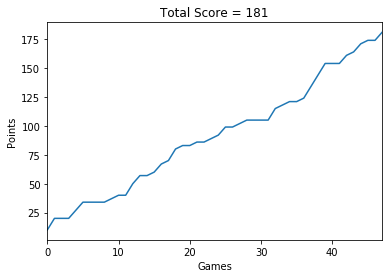

In [65]:
res = prediction_score(predicted_results, False)
score = pd.concat((actual_results, predicted_results, res), 
                  keys=['actual', 'predicted', 'result'], 
                  axis=1)
ax = score['result'].total.cumsum().plot()
ax.set_title('Total Score = {}'.format(score.loc[:, ('result', 'total')].sum()))
ax.set_xlabel('Games')
ax.set_ylabel('Points')

# Export results for Victor

In [41]:
df['Goals'] = [int(res[0]) for res in results]
df['Goals.1'] = [int(res[1]) for res in results]

In [42]:
df

,Round Number,Date,Location,Home Team,Goals,x,Goals.1,Away Team,Group
0,1,14/06/2018 18:00,"Luzhniki Stadium, Moscow",Russia,2,x,0,Saudi Arabia,Group A
1,1,15/06/2018 15:00,Ekaterinburg Stadium,Egypt,0,x,2,Uruguay,Group A
2,1,15/06/2018 18:00,Saint Petersburg Stadium,Morocco,2,x,2,Iran,Group B
3,1,15/06/2018 21:00,"Fisht Stadium, Sochi",Portugal,1,x,5,Spain,Group B
4,1,16/06/2018 13:00,Kazan Arena,France,4,x,0,Australia,Group C
5,1,16/06/2018 16:00,"Otkrytiye Arena, Moscow",Argentina,2,x,2,Iceland,Group D
6,1,16/06/2018 19:00,Saransk Stadium,Peru,2,x,0,Denmark,Group C
7,1,16/06/2018 22:00,Kaliningrad Stadium,Croatia,1,x,1,Nigeria,Group D
8,1,17/06/2018 15:00,Samara Stadium,Costa Rica,2,x,2,Serbia,Group E
9,1,17/06/2018 18:00,"Luzhniki Stadium, Moscow",Germany,1,x,1,Mexico,Group F


In [33]:
df.columns

Index(['Round Number', 'Date', 'Location', 'Home Team', 'Goals', 'x',
       'Goals.1', 'Away Team', 'Group'],
      dtype='object')

In [34]:
columns = [(x if x != 'Goals.1' else 'Goals')
           for x in df.columns ]

In [35]:
df.to_csv('predictions_sam_sinayoko.csv', index=False, header=columns)

In [36]:
cat predictions_sam_sinayoko.csv

Round Number,Date,Location,Home Team,Goals,x,Goals,Away Team,Group
1,14/06/2018 18:00,"Luzhniki Stadium, Moscow",Russia,2,x,0,Saudi Arabia,Group A
1,15/06/2018 15:00,Ekaterinburg Stadium,Egypt,0,x,2,Uruguay,Group A
1,15/06/2018 18:00,Saint Petersburg Stadium,Morocco,2,x,2,Iran,Group B
1,15/06/2018 21:00,"Fisht Stadium, Sochi",Portugal,1,x,5,Spain,Group B
1,16/06/2018 13:00,Kazan Arena,France,4,x,0,Australia,Group C
1,16/06/2018 16:00,"Otkrytiye Arena, Moscow",Argentina,2,x,2,Iceland,Group D
1,16/06/2018 19:00,Saransk Stadium,Peru,2,x,0,Denmark,Group C
1,16/06/2018 22:00,Kaliningrad Stadium,Croatia,1,x,1,Nigeria,Group D
1,17/06/2018 15:00,Samara Stadium,Costa Rica,2,x,2,Serbia,Group E
1,17/06/2018 18:00,"Luzhniki Stadium, Moscow",Germany,1,x,1,Mexico,Group F
1,17/06/2018 21:00,Rostov-on-Don Stadium,Brazil,1,x,0,Switzerland,Group E
1,18/06/2018 15:00,Nizhny Novgorod Stadium,Sweden,2,x,3,Korea Republic,Group F
1,18/06/2018 18:00,"Fisht Stadium, Sochi",Belgium,2,x,0,Panama,Group G
1,18/06/